In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#Dealing with missing data

In [2]:
x = np.array([1,2,3,'--',5])

In [3]:
x.sum()

TypeError: ignored

In [ ]:
print(x.dtype)

In [4]:
x = np.array([1,2,3,None,5])

In [5]:
x.sum()

TypeError: ignored

In [6]:
x = np.array([1,2,3,np.nan,5])

In [7]:
x.sum()

nan

In [8]:
1+np.nan

nan

In [9]:
x_b = np.array([True,True,True,False,True])

In [10]:
x[x_b]

array([1., 2., 3., 5.])

In [11]:
x[x_b].mean()

2.75

In [12]:
m_x = np.ma.masked_array(x,mask=[0,0,0,1,0])

In [13]:
m_x.mean()

2.75

In [14]:
room = pd.read_excel('/content/room.xlsx')

In [15]:
room

,Room_Number,Num_Students,Department,Occupied
0,101.0,1,Mechanical,Y
1,102.0,NaN,Empty,N
2,103.0,3,Electrical,Y
3,104.0,2,Mechanical,Y
4,105.0,NaN,Chemical,N
5,NaN,1,Electrical,Y
6,107.0,3,Civil,--
7,108.0,NaN,CS,Y
8,109.0,na,Mechanical,NaN
9,110.0,2,CS,N


# Dealing with missing data

In [16]:
room.dtypes

Room_Number     float64
Num_Students     object
Department       object
Occupied         object
dtype: object

In [17]:
%timeit np.arange(100000,dtype='int').sum()

The slowest run took 6.21 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 231 µs per loop


In [18]:
%timeit np.arange(100000,dtype='object').sum()

100 loops, best of 5: 6.2 ms per loop


In [19]:
room.Room_Number.isnull()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: Room_Number, dtype: bool

In [20]:
room.Room_Number.isnull().sum()


1

In [21]:
room.isnull()

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,False
7,False,True,False,False
8,False,False,False,True
9,False,False,False,False


In [22]:
room.isnull().sum()

Room_Number     1
Num_Students    3
Department      0
Occupied        1
dtype: int64

In [23]:
missing_values = ['NA','n/a','na','Empty',' --']

In [24]:
room = pd.read_excel('/content/room.xlsx',na_values=missing_values)

In [25]:
room.isnull()

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,True,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,True
7,False,True,False,False
8,False,True,False,True
9,False,False,False,False


In [26]:
room.isnull().sum()

Room_Number     1
Num_Students    4
Department      1
Occupied        2
dtype: int64

In [27]:
room.Num_Students.sum()

12.0

In [28]:
room.Department.unique()

array(['Mechanical', nan, 'Electrical', 'Chemical', 'Civil', 'CS'],
      dtype=object)

In [29]:
room.Occupied.fillna('NA',inplace=True)

In [30]:
room.head(10)

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,Y
1,102.0,NaN,NaN,N
2,103.0,3.0,Electrical,Y
3,104.0,2.0,Mechanical,Y
4,105.0,NaN,Chemical,N
5,NaN,1.0,Electrical,Y
6,107.0,3.0,Civil,NA
7,108.0,NaN,CS,Y
8,109.0,NaN,Mechanical,NA
9,110.0,2.0,CS,N


In [31]:
def convert_to_binary(v):
    if v == 'Y':
        return True
    else:
        False

In [32]:
room.Occupied = room.Occupied.apply(convert_to_binary)

In [33]:
room

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,True
1,102.0,NaN,NaN,None
2,103.0,3.0,Electrical,True
3,104.0,2.0,Mechanical,True
4,105.0,NaN,Chemical,None
5,NaN,1.0,Electrical,True
6,107.0,3.0,Civil,None
7,108.0,NaN,CS,True
8,109.0,NaN,Mechanical,None
9,110.0,2.0,CS,None


In [34]:
room['department2'] = room.Department

In [35]:
room.Department.fillna(method='ffill') # Forward Fill - copying the values from previous values

0    Mechanical
1    Mechanical
2    Electrical
3    Mechanical
4      Chemical
5    Electrical
6         Civil
7            CS
8    Mechanical
9            CS
Name: Department, dtype: object

In [36]:
room.Department.fillna(method='pad') # copying the values from previous values

0    Mechanical
1    Mechanical
2    Electrical
3    Mechanical
4      Chemical
5    Electrical
6         Civil
7            CS
8    Mechanical
9            CS
Name: Department, dtype: object

In [37]:
room.department2.fillna(method='bfill') # Backward fill

0    Mechanical
1    Electrical
2    Electrical
3    Mechanical
4      Chemical
5    Electrical
6         Civil
7            CS
8    Mechanical
9            CS
Name: department2, dtype: object

In [38]:
room.Num_Students.fillna(room.Num_Students.median(),inplace=True)

In [39]:
room

,Room_Number,Num_Students,Department,Occupied,department2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,2.0,NaN,None,NaN
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,2.0,Chemical,None,Chemical
5,NaN,1.0,Electrical,True,Electrical
6,107.0,3.0,Civil,None,Civil
7,108.0,2.0,CS,True,CS
8,109.0,2.0,Mechanical,None,Mechanical
9,110.0,2.0,CS,None,CS


In [40]:
room.Room_Number.interpolate(inplace=True)

In [41]:
room

,Room_Number,Num_Students,Department,Occupied,department2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,2.0,NaN,None,NaN
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,2.0,Chemical,None,Chemical
5,106.0,1.0,Electrical,True,Electrical
6,107.0,3.0,Civil,None,Civil
7,108.0,2.0,CS,True,CS
8,109.0,2.0,Mechanical,None,Mechanical
9,110.0,2.0,CS,None,CS


AMEO DATA SET 

In [44]:
df = pd.read_excel('/content/train.xlsx')

In [45]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [49]:
df.drop(df.columns[df.columns.str.contains('unnamed', case=False)],
          axis=1, inplace=True)


In [50]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [56]:
df.isnull().sum().sum()

0

In [58]:
df.Gender.unique()

array(['f', 'm'], dtype=object)

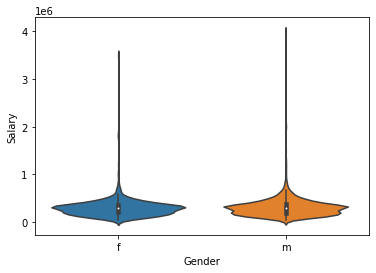

In [61]:
sns.violinplot(x='Gender',y='Salary',data=df)

In [64]:
df[['10percentage','12percentage','collegeGPA','Gender']].groupby('Gender').mean()

,10percentage,12percentage,collegeGPA
Gender,,,
f,80.932894,77.007618,74.048056
m,76.979000,73.666636,70.679947


conscientiousness          
 agreeableness              
 extraversion                  
 nueroticism              
openess_to_experience

In [66]:
df[['conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Gender']].groupby('Gender').mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


In [67]:
df[['conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Gender']].groupby('Gender').median()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.2718,0.3789,0.0914,-0.23440,0.0973
m,-0.0154,0.2124,0.0914,-0.17277,-0.0943


In [68]:
df[['Salary','Gender']].groupby('Gender').mean()

,Salary
Gender,
f,294937.304075
m,311716.211772


In [69]:
df.Salary.mean()

307699.8499249625

In [72]:
th = df.Salary.mean()+df.Salary.std()

In [73]:
df['HighIncome']= (df.Salary > th )

In [74]:
df.sample(10)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,HighIncome
246,1069569,300000,2014-06-01,2014-08-01 00:00:00,technical support engineer,-1,m,1993-07-13,81.10,state board,2010,86.70,state board,11090,2,B.Tech/B.E.,computer science & engineering,70.51,11090,1,Telangana,2014,500,350,320,0.635979,445,-1,-1,-1,-1,-1,-1,1.5644,0.8784,0.7785,-1.5021,0.6721,False
2434,1233201,85000,2014-07-01,present,ruby on rails developer,Hyderabad,m,1991-12-24,70.14,icse,2010,50.00,state board,5818,2,B.Tech/B.E.,computer science & engineering,70.00,5818,0,Orissa,2014,700,570,475,0.842248,515,-1,469,-1,-1,-1,-1,0.1282,0.7119,0.0100,0.0192,0.0973,False
3498,921009,200000,2014-07-01,present,software development engineer,-1,f,1992-10-19,88.30,state board,2010,83.50,state board,6196,2,B.Tech/B.E.,computer engineering,69.76,6196,0,Maharashtra,2014,535,595,515,0.968237,605,-1,-1,-1,-1,-1,-1,-0.3027,0.3789,-0.2974,-0.3612,0.4805,False
3407,242701,600000,2011-06-01,present,senior software engineer,Bangalore,m,1988-04-10,73.80,0,2006,55.80,0,1436,2,B.Tech/B.E.,electronics and electrical engineering,54.00,1436,0,Karnataka,2011,395,405,445,0.376060,-1,300,-1,-1,-1,286,-1,-3.5085,-1.9953,-0.7794,0.2973,-1.3934,True
2591,652269,180000,2013-12-01,2014-05-01 00:00:00,lecturer,Chennai,m,1991-12-27,76.00,icse,2009,74.00,cbse,13375,2,B.Tech/B.E.,civil engineering,77.00,13375,0,Tamil Nadu,2013,475,500,500,0.839686,-1,-1,-1,-1,-1,-1,433,-0.4463,0.2124,-1.5270,-0.4879,-0.6692,False
2810,743559,150000,2013-06-01,2014-03-01 00:00:00,system administrator,Mangalore,m,1991-12-13,75.00,cbse,2008,77.00,cbse,708,2,B.Tech/B.E.,electronics and communication engineering,70.45,708,0,Karnataka,2013,455,595,545,0.112139,425,228,-1,-1,-1,-1,-1,1.2772,1.2114,1.3933,-0.1076,0.8637,False
2935,641222,300000,2013-09-01,present,software engineer,Hyderabad,f,1992-02-01,92.30,state board,2009,93.90,state board,9769,2,B.Tech/B.E.,information technology,76.90,9769,1,Telangana,2013,465,510,635,0.765674,485,-1,-1,-1,-1,-1,-1,1.4208,1.7109,-0.1437,-1.6289,0.8637,False
936,1297805,210000,2013-11-01,present,it recruiter,New Delhi,m,1989-03-01,69.00,cbse,2007,66.60,cbse,8711,2,B.Tech/B.E.,electronics and communication engineering,67.00,8711,0,Uttar Pradesh,2012,455,495,544,-1.000000,455,-1,376,-1,-1,-1,-1,0.5591,-0.2871,0.1637,0.1459,0.2889,False
655,595058,500000,2012-09-01,present,senior software engineer,Coimbatore,f,1989-02-19,87.63,matriculation,2006,79.83,matriculation,6503,2,MCA,computer application,89.00,6503,0,Tamil Nadu,2012,430,525,425,0.901490,545,-1,-1,-1,-1,-1,-1,-0.3027,-1.2861,0.0100,2.1743,-1.4356,False
2650,1094191,300000,2014-09-01,present,software engineer,Noida,f,1993-03-05,88.80,cbse,2010,80.00,cbse,12737,2,B.Tech/B.E.,computer science & engineering,76.00,12737,1,Rajasthan,2014,720,530,415,0.486747,435,-1,376,-1,-1,-1,-1,0.4155,-0.2871,-0.4511,-0.8682,-0.6692,False


In [76]:
df[['Salary','HighIncome','Gender']].groupby(['HighIncome','Gender']).mean()

Salary
HighIncome Gender               
False      f       271499.454744
           m       272598.433606
True       f       832250.000000
           m       785344.827586

In [77]:
df[['Salary','HighIncome','Gender']].groupby(['HighIncome','Gender']).count()

Salary
HighIncome Gender        
False      f          917
           m         2809
True       f           40
           m          232

In [78]:
print('Low income female percentage',917/(2809+917)*100)

Low income female percentage 24.610842726784757


In [79]:
print( 'High income female percentage',40/(40+232)*100)

High income female percentage 14.705882352941178


In [80]:
df.CollegeTier.unique()

array([2, 1])

In [82]:
df[['CollegeTier','HighIncome','Salary']].groupby(['HighIncome','CollegeTier']).count()

Salary
HighIncome CollegeTier        
False      1               234
           2              3492
True       1                63
           2               209

In [83]:
print('Low income college  tier 2 percentage',3492/(234+3492)*100)

Low income college  tier 2 percentage 93.71980676328504


In [84]:
print('High income college  tier 2 percentage',209/(209+63)*100)

High income college  tier 2 percentage 76.83823529411765


In [85]:
df[['Gender','CollegeTier','Salary']].groupby(['CollegeTier','Gender']).count()

Salary
CollegeTier Gender        
1           f           51
            m          246
2           f          906
            m         2795

In [86]:
print('In college  tier 1 Female percentage is ',51/(51+246)*100)

In college  tier 1 Female percentage is  17.17171717171717


In [87]:
print('In college  tier 2 Female percentage is ',906/(906+2795)*100)

In college  tier 1 Female percentage is  24.479870305322883
